In [4]:
import pandas as pd

df = pd.read_csv("final_new.csv")

print(df.columns)

Index(['id', 'month', 'day', 'date', 'weather_code', 'temperature_2m_mean',
       'temperature_2m_max', 'temperature_2m_min', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'wind_direction_10m_dominant',
       'shortwave_radiation_sum', 'et0_fao_evapotranspiration',
       'weather_status', 'next_day_weather_status'],
      dtype='object')


Mean Squared Error: 6.243617697249675
R2 Score: 97.82132602546912
accuracy: 97.82132602546912


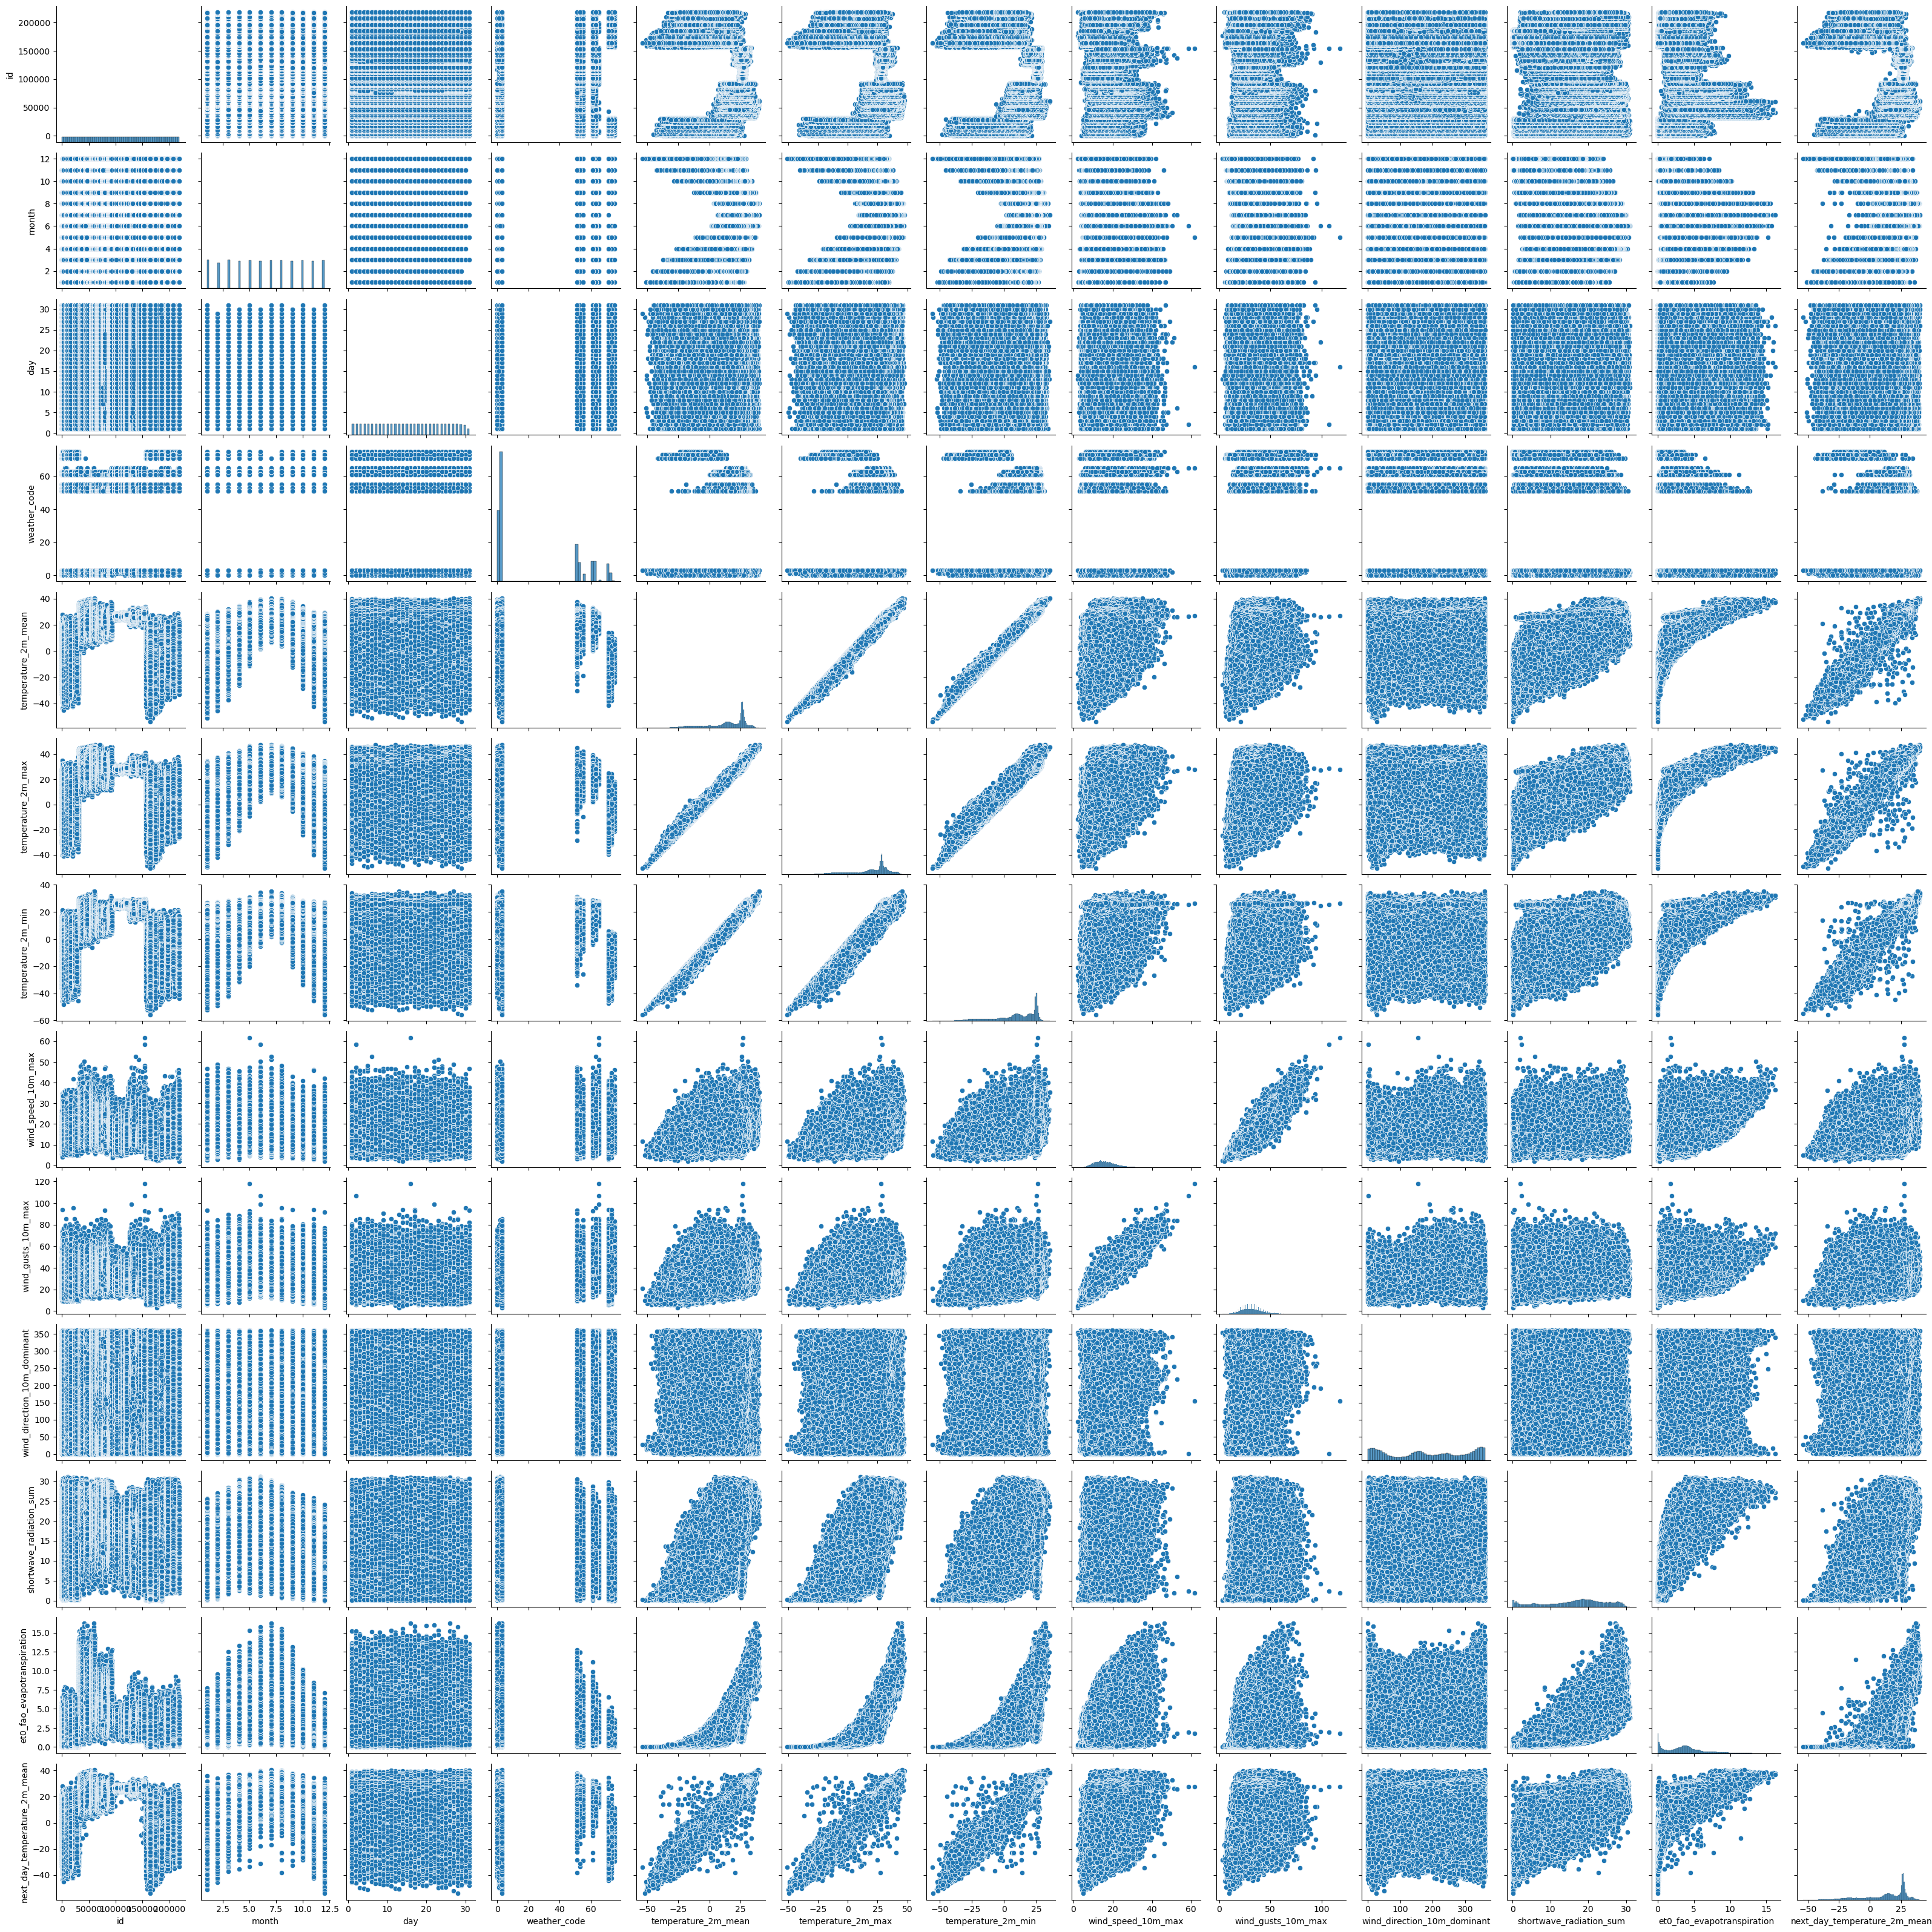

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import seaborn as sns
# Assuming df is your DataFrame
# Create the next day's temperature column by shifting the `temperature_2m_mean` column
df['next_day_temperature_2m_mean'] = df['temperature_2m_mean'].shift(-1)

# Drop the last row because it will have NaN for `next_day_temperature_2m_mean`
df = df.dropna(subset=['next_day_temperature_2m_mean'])


# Features selection (current day's features)
features = ['month', 'day','temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 
            'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 
            'shortwave_radiation_sum', 'et0_fao_evapotranspiration']

# Target variable (next day's temperature)
target = 'next_day_temperature_2m_mean'



# Extract features and target variable
X = df[features]
y = df[target]



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100
acc= model.score(X_test, y_test) *100
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"accuracy: {acc}")
